In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

dataset_folder_name = "/content/drive/MyDrive/IS3107 Project/data"
album_path = os.path.join(dataset_folder_name, 'album_df.pkl')
artist_path = os.path.join(dataset_folder_name, 'artist_df.pkl')
audio_path = os.path.join(dataset_folder_name, 'audio_df.pkl')
track_path = os.path.join(dataset_folder_name, 'track_df.pkl')

album_df = joblib.load(album_path)
artist_df = joblib.load(artist_path)
audio_df = joblib.load(audio_path)
track_df = joblib.load(track_path)

Mounted at /content/drive


In [2]:
album_df.head()

,index,id,artist_id,album_name,total_tracks,release_date,popularity
0,0,6i7mF7whyRJuLJ4ogbH2wh,4oUHIQIBe0LHzYfvXNW4QM,One Thing At A Time,36,2023-03-03,98
1,1,4kS7bSuU0Jm9LYMosFU2x5,790FomKkXshlbRYZFtlgla,MAÑANA SERÁ BONITO,17,2023-02-24,98
2,2,0HiZ8fNXwJOQcrf5iflrdz,5YGY8feqx7naU7z4HrwZM6,Endless Summer Vacation,13,2023-03-10,92
3,3,6cVfHBcp3AdpYY0bBglkLN,78rUTD7y6Cy67W1RVzYs7t,Boy's a liar Pt. 2,2,2023-02-03,90
4,4,25Uddgldy3slnChqKqHsIM,3qiHUAX7zY4Qnjx8TNUzVx,AftërLyfe,22,2023-02-24,86


In [3]:
artist_df.head()

,level_0,index,artist_id,artist_name,genre,popularity
0,0,0,4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,[contemporary country],94
1,1,1,3TVXtAsR1Inumwj472S9r4,Drake,"[canadian hip hop, canadian pop, hip hop, rap,...",98
2,2,2,06HL4z0CvFAxyc27GXpf02,Taylor Swift,[pop],100
3,3,3,1Xyo4u8uXC1ZmMpatF05PJ,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",99
4,4,4,7tYKF4w9nC0nq9CsPZTHyP,SZA,"[pop, r&b]",94


In [4]:
audio_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4
1,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
2,0.517,0.675,6,-5.382,1,0.0357,0.4590,0.000000,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
3,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,audio_features,7oDd86yk8itslrA9HRP2ki,spotify:track:7oDd86yk8itslrA9HRP2ki,https://api.spotify.com/v1/tracks/7oDd86yk8its...,https://api.spotify.com/v1/audio-analysis/7oDd...,232857,4
4,0.492,0.675,6,-5.456,1,0.0389,0.4670,0.000000,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4


In [5]:
track_df.head()

,index,track_id,artist_id,track_name,popularity,album_id
0,0,6AQbmUe0Qwf5PZnt4HmTXv,78rUTD7y6Cy67W1RVzYs7t,Boy's a liar Pt. 2,96,6cVfHBcp3AdpYY0bBglkLN
1,1,0yLdNVWF3Srea0uzk55zFn,5YGY8feqx7naU7z4HrwZM6,Flowers,100,7I0tjwFtxUwBC1vgyeMAax
2,2,59uQI0PADDKeE6UZDTJEe8,4oUHIQIBe0LHzYfvXNW4QM,Last Night,88,7fOmdhRrRohTzToL617xkk
3,3,7oDd86yk8itslrA9HRP2ki,1Xyo4u8uXC1ZmMpatF05PJ,Die For You - Remix,95,6Exo0MYoL3XammoTDeihFy
4,4,7K3BhSpAxZBznislvUMVtn,4oUHIQIBe0LHzYfvXNW4QM,Last Night,85,6i7mF7whyRJuLJ4ogbH2wh


In [3]:
track_details = pd.merge(audio_df, track_df, left_on = 'id', right_on='track_id', how='inner')
track_details = track_details.drop(['index', 'artist_id', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'track_id', 'track_name', 'album_id'], axis=1)
track_details

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0.696,0.809000,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,131013,4,96
1,0.696,0.809000,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,131013,4,96
2,0.696,0.809000,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,131013,4,96
3,0.696,0.809000,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,131013,4,96
4,0.696,0.809000,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,131013,4,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,0.799,0.361000,1,-11.569,1,0.3970,0.1450,0.000000,0.1080,0.3300,111.104,161838,5,6
8082,0.198,0.000956,9,-36.318,0,0.0486,0.9900,0.905000,0.1010,0.1110,106.713,169673,3,21
8083,0.198,0.065700,7,-20.771,1,0.0375,0.9830,0.963000,0.0684,0.0372,64.911,213788,4,23
8084,0.743,0.223000,2,-14.090,0,0.1520,0.0861,0.848000,0.0918,0.8890,187.942,30672,4,48


In [4]:
df_train, df_test = train_test_split(track_details, 
                                     test_size = 0.3, 
                                     random_state = 10)
y_train = df_train.pop('popularity')
X_train = df_train

y_test = df_test.pop('popularity')
X_test = df_test

# Linear Regression

Fitting 5 folds for each of 13 candidates, totalling 65 fits


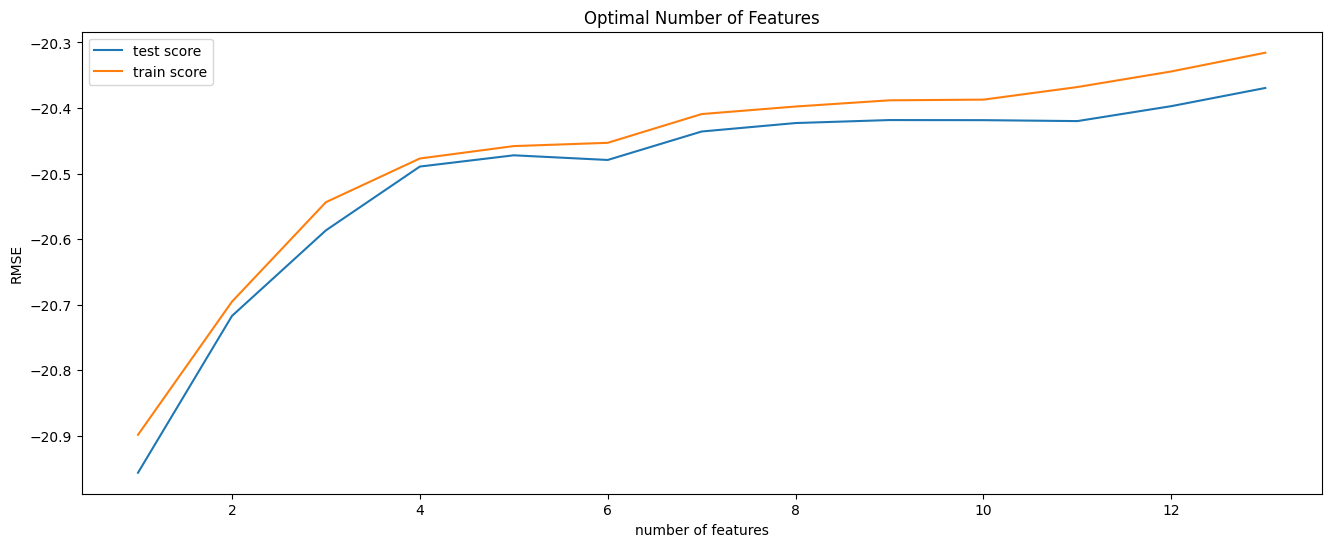

In [6]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

# perform grid search
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('RMSE')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [7]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

20.663476175853074


# XGBoost

In [8]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print ("SCORE:", rmse)
    return {'loss': -rmse, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
19.5325762154044
SCORE:
19.562500564273282
SCORE:
19.483317026446056
SCORE:
19.80170005049678
SCORE:
19.436602466774687
SCORE:
19.688044238697273
SCORE:
19.54039224289427
SCORE:
19.630992875712966
SCORE:
19.80736633618856
SCORE:
19.44677323253204
SCORE:
19.462570648719506
SCORE:
19.679820546027702
SCORE:
19.66837768891216
SCORE:
19.529285655306865
SCORE:
19.930782468398593
SCORE:
19.45482677366525
SCORE:
19.461584782153555
SCORE:
19.419503582114178
SCORE:
19.150203940322527
SCORE:
19.528197027779914
SCORE:
19.84383480388092
SCORE:
19.801589499927857
SCORE:
19.79792295627646
SCORE:
19.52761556872327
SCORE:
19.831401442775327
SCORE:
19.52246112874671
SCORE:
19.802064234144606
SCORE:
19.372231860697255
SCORE:
19.514919077964972
SCORE:
19.62754513042109
SCORE:
19.47519547158588
SCORE:
19.44843879269566
SCORE:
19.392822613090622
SCORE:
19.59382355216746
SCORE:
19.533259732963526
SCORE:
19.396174820283093
SCORE:
19.702324391943893
SCORE:
19.38503859768551
SCORE:
19.425517125319146
SCO

In [9]:
clf=xgb.XGBRegressor(n_estimators = 180, max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                    reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                    colsample_bytree=int(best_hyperparams['colsample_bytree']))
evaluation = [( X_train, y_train), ( X_test, y_test)]
clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

y_pred = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print ("SCORE:", rmse)

SCORE: 19.953962023869042


In [13]:
joblib.dump(clf, 'xgb.joblib')

['xgb.joblib']

# RandomForest

In [10]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print("The best hyperparameters are : ","\n")
print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print ("SCORE:", rmse)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
The best hyperparameters are :  

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
SCORE: 17.799348184847194


In [12]:
best_params = grid_search.best_params_
model = RandomForestRegressor(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'],max_features=best_params['max_features'], 
                              min_samples_leaf=best_params['min_samples_leaf'],min_samples_split=best_params['min_samples_split'],n_estimators=best_params['n_estimators'])
model.fit(X_train, y_train)

# Save trained model to file
joblib.dump(model, 'model.joblib')

['model.joblib']